# STAT 301 Project - Tyler Yih (Group 31)

## Project Stage 1: Data Description & Exploratory Data Analysis

### 0. TA feedback

Stage 1 Score: 28/30

*Pre-selection of variables: `room_type` provides more information than `room_shared` and `room_private` combined. Why choose to keep `room_shared` and `room_private` instead?*
- `room_type` I made a typo in Stage 1 of my project. I did in fact keep room_type instead of `room_shared` and `room_private`

*Scientific Question: longitude and latitude may not be relevant as we don't cover spatial analysis in this course.*
- Noted, I will remove them.

*Visualization: the legend for Day type is missing.*
- Noted, I will add one to my plot.

*Visualization: Interpretation: The word "cause" can be misleading. Association vs causation.*
- Noted, I changed the wording to "associatied with..."

*Visualization: Interpretation: The visualization suggests that `day_type` is a promising predictors to include?*
- It does not suggest that `day_type` is a promising indicator to include. I will remove it.

### 1. Data Description

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(broom)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [2]:
# Airbnb data in Athens on weekdays
weekdays <- read_csv("data/athens_weekdays.csv")
head(weekdays)

New names:
• `` -> `...1`
Rows: 2653 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,129.82448,Entire home/apt,FALSE,FALSE,4,FALSE,0,0,10,100,2,2.8139635,0.8818900,55.34857,2.086871,78.77838,5.915160,23.76600,37.98300
1,138.96375,Entire home/apt,FALSE,FALSE,4,TRUE,1,0,10,96,1,0.4072929,0.3045679,240.30665,9.060559,407.16770,30.572629,23.73168,37.97776
2,156.30492,Entire home/apt,FALSE,FALSE,3,TRUE,0,1,10,98,1,1.2372111,0.2884881,199.50737,7.522257,395.96740,29.731642,23.72200,37.97900
3,91.62702,Entire home/apt,FALSE,FALSE,4,TRUE,1,0,10,99,1,4.3674572,0.2974673,39.80305,1.500740,58.70658,4.408047,23.72712,38.01435
4,74.05151,Private room,FALSE,TRUE,2,FALSE,0,0,10,100,1,2.1941850,0.3852657,78.73340,2.968577,113.32597,8.509204,23.73391,37.99529
5,113.88934,Entire home/apt,FALSE,FALSE,6,TRUE,1,0,10,96,2,2.0712056,0.4538674,96.58899,3.641806,158.64432,11.911981,23.71584,37.98598


In [3]:
# Airbnb data in Athens on weekends
weekends <- read_csv("data/athens_weekends.csv")
head(weekends)

New names:
• `` -> `...1`
Rows: 2627 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,138.96375,Entire home/apt,FALSE,FALSE,4,TRUE,1,0,10,96,1,0.4072777,0.3045697,240.30650,9.054205,407.16796,6.0806216,23.73168,37.97776
1,91.62702,Entire home/apt,FALSE,FALSE,4,TRUE,1,0,10,99,1,4.3674631,0.2974735,39.80300,1.499687,58.70652,0.8767197,23.72712,38.01435
2,76.62925,Private room,FALSE,TRUE,2,FALSE,0,0,10,100,1,2.1941738,0.3852475,78.73400,2.966519,113.32668,1.6924138,23.73391,37.99529
3,151.85246,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,10,100,2,2.5089816,0.5634735,68.77488,2.591282,101.16207,1.5107482,23.73200,37.99800
4,98.65723,Entire home/apt,FALSE,FALSE,2,TRUE,1,0,10,95,1,2.7405814,0.7250455,62.90286,2.370037,92.61113,1.3830489,23.73100,38.00000
5,173.88044,Entire home/apt,FALSE,FALSE,4,TRUE,1,0,10,97,1,0.8690264,0.4707861,132.33536,4.986097,221.33873,3.3054592,23.73680,37.98331


#### Provide a descriptive summary

- The two datasets provide information on Airbnb prices in Athens, Greece on weekends and weekdays, including room type, cleanliness rating, guest satisfaction score, number of bedrooms, and distance from the city centre.
- The weekdays dataset consists of 2,653 entries, and the weekends dataset consists of 2,627 entries.
- Both datasets have 20 variables, whose names, descriptions, and types are provided in the table below.

| Variable Name                 | Description                                                     | Type        |
|-------------------------------|-----------------------------------------------------------------|-------------|
| `(index)`                     | Index of the row in the table                                   | Numeric     |
| `realSum`                     | Full price of accommodation for two people and two nights (EUR) | Numeric     |
| `room_type`                   | Type of the accommodation                                       | Categorical |
| `room_shared`                 | Whether the room is shared                                      | Boolean     |
| `room_private`                | Whether the room is private                                     | Boolean     |
| `person_capacity`             | Maximum number of guests                                        | Numeric     |
| `host_is_superhost`           | Whether the host is a superhost                                 | Boolean     |
| `multi`                       | Whether the listing belongs to hosts with 2-4 offers            | Boolean     |
| `biz`                         | Whether the listing belongs to hosts with more than 4 offers    | Boolean     |
| `cleanliness_rating`          | Cleanliness rating of the listing                               | Numeric     |
| `guest_satisfaction_overall`  | Overall guest satisfaction rating                               | Numeric     |
| `bedrooms`                    | Number of bedrooms in the listing (0 for studios)               | Numeric     |
| `dist`                        | Distance from the city centre (km)                              | Numeric     |
| `metro_dist`                  | Distance from the nearest metro station (km)                    | Numeric     |
| `attr_index`                  | Attraction index of the listing location                        | Numeric     |
| `attr_index_norm`             | Normalized attraction index (0-100)                             | Numeric     |
| `rest_index`                  | Restaurant index of the listing location                        | Numeric     |
| `rest_index_norm`             | Normalized restaurant index (0-100)                             | Numeric     |
| `lng`                         | Longitude of the listing location                               | Numeric     |
| `lat`                         | Latitude of the listing location                                | Numeric     |


#### Source and information

- The data was collected with web-scraping done with the help of a web-automation framework (Selenium WebDriver) during a study done by Gyódi, Kristóf and Nawaro, Łukasz, and attractiveness was based on TripAdvisor data.
- The data, provided by the University of Warsaw, was used to collect Airbnb offers that would be presented to a real user.
- *Sources:*

https://doi.org/10.5281/zenodo.4446043

https://doi.org/10.1016/j.tourman.2021.104319

#### Pre-selection of variables

In [4]:
unique(weekdays$room_type)

[1] "Entire home/apt" "Private room"    "Shared room"

`room_type`, `room_shared`, and `room_private` have overlapping information, so we probably only need to keep one of theese features, `room_type`.

The `...1` (index) column isn't very useful information wise either.

Both `attr_index` and `rest_index` will be heavily overlapping with their normalized counterparts. We only need to use one, most likely the normalized version.

<mark>Lastly, we will remove longitude and latitude since we don't cover spatial analysis in this course.</mark>

### 2. Scientific Question

#### Clearly state the question you want try to answer using the dataset

- We want to examine the association between the price of the accommodation for two people staying two nights (response) and predictors related to room characteristics (e.g. room type, number of bedrooms), location information (e.g. distance from city centre, longitude, latitude), and the attraction index.
- The response is `real_sum`, the price of the accommodation for two people staying two nights in Euros.
- Our question is primarily focused on inference, as we are identifying which features are associated with price and estimating their effects. We may build a predictive model later and keep our options open.

### 3. Exploratory Data Analysis and Visualization

#### Data cleaning and wrangling

In [5]:
library(tidyverse)

weekdays <- read_csv("data/athens_weekdays.csv")
weekends <- read_csv("data/athens_weekends.csv")

athens <- bind_rows(
  # bind the two datasets together into a single tibble
  mutate(weekdays, day_type = "weekday"),
  mutate(weekends, day_type = "weekend")
) |>
  mutate(
    day_type = factor(day_type, levels = c("weekday", "weekend"))
  ) |> # make day_type a factor
  select(-room_shared, -room_private, -`...1`, -lng, -lat) |> # drop columns discussed in Section 1; NOTE: longitude and latitude dropped now
  rename(real_sum = realSum) |>
  mutate(
    room_type = str_squish(room_type),
    room_type = factor(
      room_type,
      levels = c("Entire home/apt", "Private room", "Shared room")
    ),
    room_type = fct_recode(
      room_type,
      "entire" = "Entire home/apt",
      "private" = "Private room",
      "shared" = "Shared room"
    )
  ) |>
  mutate(
    num_host_offers = case_when(
      biz == 1 ~ "moreThanFour",
      multi == 1 ~ "twoToFour",
      TRUE ~ "one"
    ),
    num_host_offers = factor(
      num_host_offers,
      levels = c("moreThanFour", "twoToFour", "one")
    ) # combine biz and multi into a single categorical column
  ) |>
  select(-multi, -biz)

head(athens)
summary(athens$real_sum)

New names:
• `` -> `...1`
Rows: 2653 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 2627 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


real_sum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,day_type,num_host_offers
<dbl>,<fct>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
129.82448,entire,4,FALSE,10,100,2,2.8139635,0.8818900,55.34857,2.086871,78.77838,5.915160,weekday,one
138.96375,entire,4,TRUE,10,96,1,0.4072929,0.3045679,240.30665,9.060559,407.16770,30.572629,weekday,twoToFour
156.30492,entire,3,TRUE,10,98,1,1.2372111,0.2884881,199.50737,7.522257,395.96740,29.731642,weekday,moreThanFour
91.62702,entire,4,TRUE,10,99,1,4.3674572,0.2974673,39.80305,1.500740,58.70658,4.408047,weekday,twoToFour
74.05151,private,2,FALSE,10,100,1,2.1941850,0.3852657,78.73340,2.968577,113.32597,8.509204,weekday,one
113.88934,entire,6,TRUE,10,96,2,2.0712056,0.4538674,96.58899,3.641806,158.64432,11.911981,weekday,twoToFour


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   42.88    98.66   127.72   151.74   171.54 18545.45 

#### Provide a visualization that you consider relevant to address your question or to explore the data

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


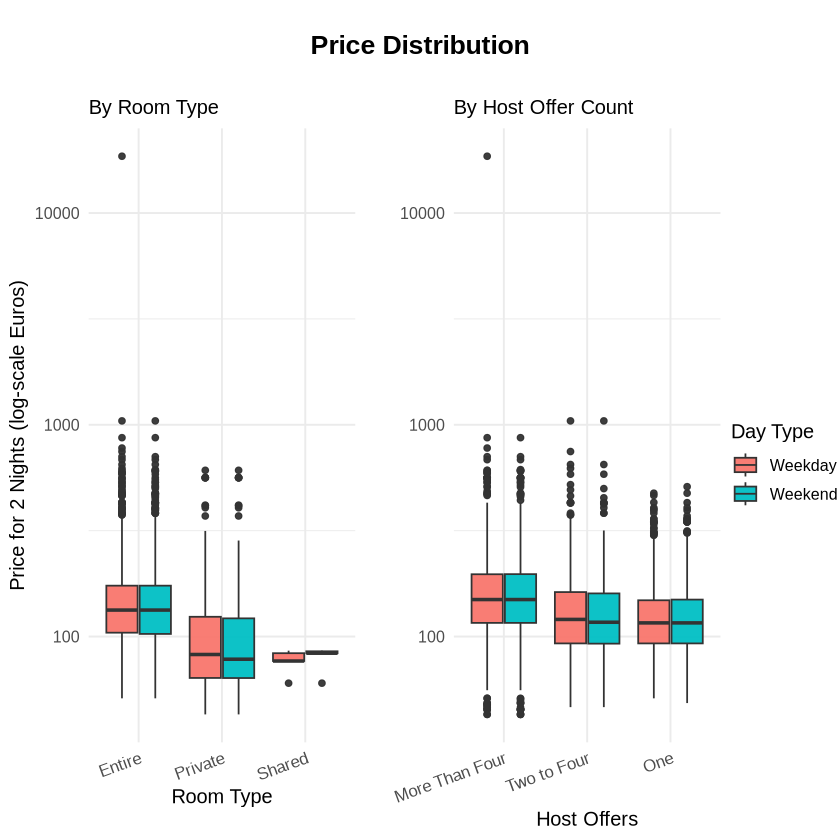

In [6]:
p1 <- ggplot(athens, aes(x = room_type, y = real_sum, fill = day_type)) +
  geom_boxplot(position = position_dodge(width = 0.8), alpha = 0.95) +
  scale_y_log10() +
  scale_x_discrete(labels = function(x) str_to_title(x)) +
  scale_fill_discrete(labels = function(x) str_to_title(x)) +
  labs(
    x = "Room Type",
    y = "Price for 2 Nights (log-scale Euros)",
    fill = "Day Type"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "top",
    strip.text = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5, size = 14, margin = margin(b = 10)),
    axis.text.x = element_text(angle = 20, vjust = 1, hjust = 1, size = 10)
  )

p2 <- ggplot(athens, aes(x = num_host_offers, y = real_sum, fill = day_type)) +
  geom_boxplot(position = position_dodge(width = 0.8), alpha = 0.95) +
  scale_y_log10() +
  scale_x_discrete(
    labels = function(x) case_when(
      x == "moreThanFour" ~ "More Than Four",
      x == "one" ~ "One",
      x == "twoToFour" ~ "Two to Four",
      TRUE ~ str_to_title(x)
    )) +
  scale_fill_discrete(labels = function(x) str_to_title(x)) +
  labs(
    x = "Host Offers",
    y = NULL,
    fill = "Day Type"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "top",
    strip.text = element_text(face = "bold"),
    plot.title = element_text(hjust = 0.5, size = 14, margin = margin(b = 10)),
    axis.text.x = element_text(angle = 20, vjust = 1, hjust = 1, size = 10)
  )

legend <- get_legend(p1 + theme(legend.position = "right"))

plot_grid(
  ggdraw() + 
    draw_label(
      "Price Distribution", 
      fontface = 'bold', 
      x = 0.5, 
      hjust = 0.5,
      size = 16
    ),
  plot_grid(
    plot_grid(
      p1 + labs(subtitle = "By Room Type", title = NULL) + theme(legend.position = "none"),
      p2 + labs(subtitle = "By Host Offer Count", title = NULL) + theme(legend.position = "none"),
      ncol = 2,
      align = "hv",
      axis = "tblr",
      rel_widths = c(1, 1)
    ),
    legend,
    ncol = 2,
    rel_widths = c(1, 0.15)
  ),
  ncol = 1,
  rel_heights = c(0.12, 1)
)

#### Provide the following Interpretations

##### Explain why you consider this plot relevant to address your question or to explore the data.
- This plot is relevant because it shows how the response (`real_sum`) varies across two key categorical predictors (`room_type` and `num_host_offers`), and how that relationship shifts by `day_type`.
- Using boxplots on a log10 y-scale makes the skewed price distribution easier to compare and helps spot group-level differences and heteroscedasticity that are important for later inference.
##### Interpret briefly the results obtained.
- `entire` Airbnb offers show substantially higher medians and much wider variability than `private` or `shared` offerings, and the `entire` category contains extreme high-price outliers that extend far above the rest of the distribution.
- `shared` appears very narrow and has few observations.
- <mark>Lastly, we notice the two `day_type` fills is <mark>associated with</mark> only small within-group shifts in medians, suggesting weekday/weekend differences exist but are not huge in these raw comparisons.</mark>
##### Interpret briefly the results obtained.
- The visualization suggests `room_type` and `num_host_offers` are promising predictors to include (and possibly interact) in a regression for inference, and it justifies the log-transform of price.
- It also reveals various problems to address in modelling, such as strong right skew and outliers, unequal group sizes, and confounding from variables that we haven't explored yet.
- The next steps are to check sample sizes per cell, examine covariate balance, and build a model using relevant features.

## Project Stage 2: Method, Plan, Computation Code and Output

### 4. Method and Plan 

#### Proposed method (one-line)
- **Multiple linear regression (MLR)** on `log(real_sum)` using `room_type`, `person_capacity`, `host_is_superhost`, `cleanliness_rating`, `guest_satisfaction_overall`, `bedrooms`, `dist`, `metro_dist`, `attr_index`, `rest_index`, `rest_index_norm` and `num_host_offers`.

#### Why is this method appropriate?
- MLR directly estimates associations between multiple predictors and the (transformed) price while producing interpretable effect estimates and hypothesis tests.  
- Log-transforming `real_sum` stabilizes variance and turns multiplicative effects into additive ones, so coefficients approximate percent changes (this is convenient for skewed price data).

#### Which assumptions are required?
- Linearity: the predictors relate linearly to `log(real_sum)`, and the errors are independent with mean zero. 
- We are assuming homoskedasticity and normality of residuals for valid standard inference, as well as low multicollinearity among predictors, for stable coefficient estimates.

#### Potential limitations or weaknesses
- While log-transform helps, mutliers and heavy right skew can still influence estimates.
- Heteroskedasticity or non-normal errors would invalidate standard SEs.  
- Omitted confounders (e.g. spatial clustering) can make some coefficients unstable or biased.

### 5. Computational Code and Output

In [7]:
mlr_fit <- lm(formula = log(real_sum) ~ . - day_type, data = athens)

mlr_res <- tidy(mlr_fit, conf.int = TRUE) |>
    mutate_if(is.numeric, round, 2)

mlr_res

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.92,0.06,64.04,0.00,3.80,4.04
room_typeprivate,-0.27,0.02,-15.01,0.00,-0.30,-0.23
room_typeshared,-0.50,0.10,-5.08,0.00,-0.70,-0.31
person_capacity,0.07,0.00,14.90,0.00,0.06,0.08
host_is_superhostTRUE,0.03,0.01,2.79,0.01,0.01,0.05
cleanliness_rating,0.05,0.01,6.41,0.00,0.04,0.07
guest_satisfaction_overall,0.00,0.00,1.41,0.16,0.00,0.00
bedrooms,0.12,0.01,13.43,0.00,0.10,0.14
dist,-0.07,0.01,-10.79,0.00,-0.08,-0.06


#### Interpretation of Results

- **Expected associations:** `room_type = private` and `room_type = shared` are priced significantly lower than `room_type = entire`, and price increases with `person_capacity`, `bedrooms`, `cleanliness_rating`, and stronger `attr_index` / `rest_index`, while greater `dist` and `metro_dist` reduce price; these patterns directly address our inferential question by identifying which room and location features are meaningfully associated with accommodation price.  
- **Other effects:** `host_is_superhost = TRUE` carries a small but statistically significant price premium, whereas `guest_satisfaction_overall` is not significant, suggesting limited additional explanatory value once other factors are included.  
- **Significance and uncertainty:** Most predictors have very small p-values and narrow 95% confidence intervals, indicating precise and robust estimates for the variables associated with price.  
- **Multicollinearity issue and remedies:** The opposing signs and large magnitudes of `attr_index` and `attr_index_norm`, despite both being highly significant, indicate multicollinearity and unstable individual estimates; this can be addressed by checking VIFs or applying regularization (ridge/lasso).